<a href="https://colab.research.google.com/github/HauwaUmar/DATA-6100/blob/main/final_submission_draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # to split train and test
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import norm, skew #for some statistics


In [2]:
train_dataset = pd.read_csv("train.csv")
true_test_dataset = pd.read_csv("test.csv")

In [3]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train_dataset.shape))
print("The test data size before dropping Id feature is : {} ".format(true_test_dataset.shape))

#Save the 'Id' column
train_ID = train_dataset['Id']
test_ID = true_test_dataset['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train_dataset.drop("Id", axis = 1, inplace = True)
true_test_dataset.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train_dataset.shape)) 
print("The test data size after dropping Id feature is : {} ".format(true_test_dataset.shape))

The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 

The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


In [4]:
# combine both testing and training dataset for transformation
whole_dataset = pd.concat((train_dataset, true_test_dataset)).reset_index(drop = True)

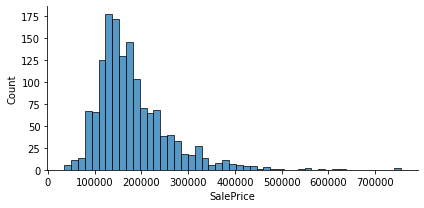

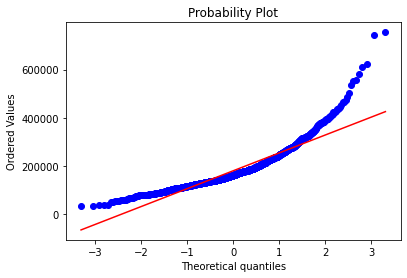

In [5]:
# checking the distribution for the target
sns.displot(train_dataset['SalePrice'], height=3, aspect=2)


#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train_dataset['SalePrice'], plot=plt)
plt.show()

The target variable is right skewed. As (linear) models love normally distributed data , we need to transform this variable and make it more normally distributed.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


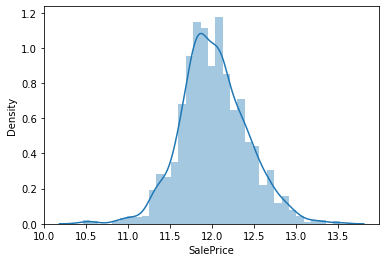

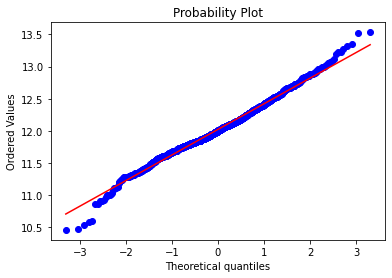

In [6]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train_dataset["SalePrice"] = np.log1p(train_dataset["SalePrice"])

#Check the new distribution 
sns.distplot(train_dataset['SalePrice']);

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train_dataset['SalePrice'], plot=plt)
plt.show()

The data now looks better i.e. it looks more normally distributed.

# Handling missing data


Remember we concatenated thr train and test data set to a dataframe called "whole_dataset". We will use that for our data cleaning so both datasets can be aligned

In [7]:
# this function will go through the data frame and return information on columns with missing values such as the number of missing data in each column and the percentage of missing value overall for each column
def info_on_missing_values(df):
    total_missing_values = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percentage = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    data_type = df.dtypes.sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    decription_of_missing_values = pd.concat([total_missing_values, percentage, data_type], axis=1, keys=['Total Missing Val','Percentage','Data Type'])
    return decription_of_missing_values

info_on_missing_values(whole_dataset)

,Total Missing Val,Percentage,Data Type
PoolQC,2909,99.66,object
MiscFeature,2814,96.40,object
Alley,2721,93.22,object
Fence,2348,80.44,object
SalePrice,1459,49.98,float64
FireplaceQu,1420,48.65,object
LotFrontage,486,16.65,float64
GarageCond,159,5.45,object
GarageFinish,159,5.45,object
GarageQual,159,5.45,object


Text(0.5, 1.0, 'Numberof missing data by variable')

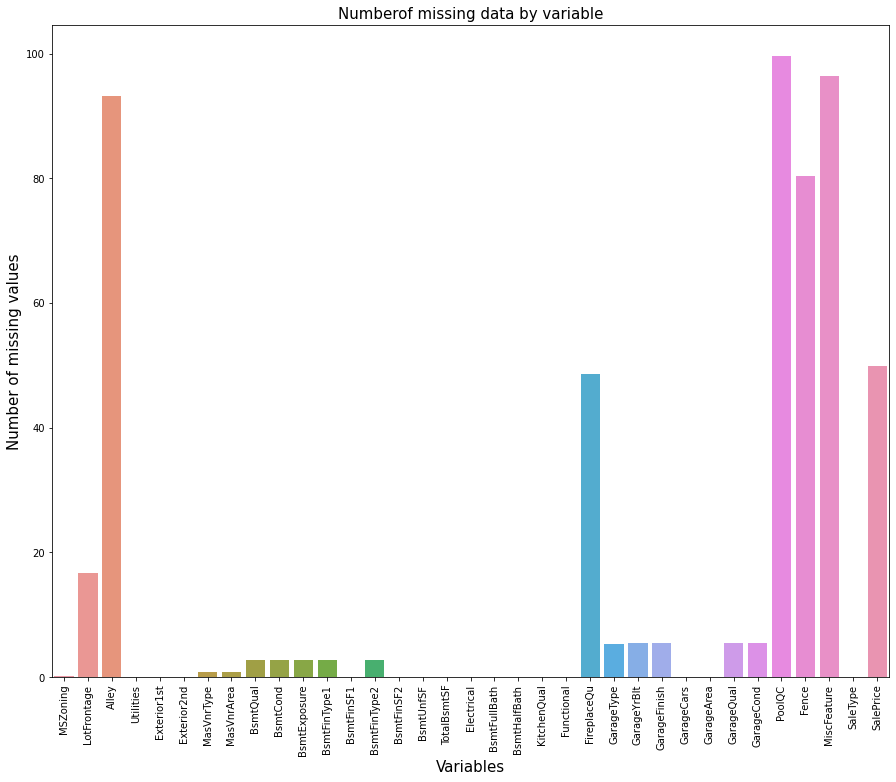

In [11]:

col = whole_dataset.columns[whole_dataset.isna().any().to_list()]
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=col, y=(whole_dataset[col].isnull().sum().values)/len(whole_dataset)*100)
plt.xlabel('Variables', fontsize=15)
plt.ylabel('Percentage of missing values', fontsize=15)
plt.title('Percentage of missing data by variable', fontsize=15)

The sale price column is missing half because the test dataset doesn't have sale price because that is what we are trying

In [ ]:
# storing the sale price in another data frame
Y_dataframe = pd.DataFrame()
Y_dataframe['SalePrice'] = whole_dataset['SalePrice'][:1460]
Y_dataframe.shape
Y_dataframe

In [16]:
# dropping columns with less than 2000 rows of data 
whole_dataset = whole_dataset.dropna(axis=1,thresh=2000)

info_on_missing_values(whole_dataset)

,Total Missing Val,Percentage,Data Type
LotFrontage,486,16.65,float64
GarageQual,159,5.45,object
GarageYrBlt,159,5.45,float64
GarageFinish,159,5.45,object
GarageCond,159,5.45,object
GarageType,157,5.38,object
BsmtExposure,82,2.81,object
BsmtCond,82,2.81,object
BsmtQual,81,2.77,object
BsmtFinType2,80,2.74,object


The list of missing columns has reduced because we have dropped the columns that have a high number of missing values 

Some columns have only 4 missing values or less. We'll fill those missing columns with 0's or None depending on the data type of the column 

In [20]:
# making a list of columns with missing values
missing_val_cols = whole_dataset.columns[whole_dataset.isna().any()]
# filling columns with missing values less than 5 with 0 or None
for col in missing_val_cols:
    if whole_dataset[col].isnull().sum() <5:
        if whole_dataset[col].dtype == 'object':
            whole_dataset[col]= whole_dataset[col].fillna('None')
        else:
            whole_dataset[col] = whole_dataset[col].fillna(0)


# making a new list of columns with missing values 
missing_val_cols_2 = whole_dataset.columns[whole_dataset.isna().any()]

## Analysing each column with missing data 

We have a list of columns left with missing data now we go throught them individually to decide what method to fill them with is the best 